In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Helpers.ClaimClassifier import ClaimClassifier
from Helpers.RedditScraper import RedditScraper
import pandas as pd

/Users/vinayakkannan/Desktop/Projects/FactChecker/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
scraper = RedditScraper(limit=10000, claim_limit=10000)
scraper.find_subreddits('greta thunberg')
output = scraper.export_subreddits_to_pandas()
response = scraper.get_claims(output, 'body')
# Write response to file
response.to_csv('../Clustering/Transformed Data/scored_reddit_posts.csv', index=False)

241it [00:50,  4.76it/s]
8506it [01:21, 104.04it/s]


In [19]:
response = pd.read_csv('../Clustering/Transformed Data/scored_reddit_posts.csv')
classifier = ClaimClassifier('../Clustering/Models')
output_df = pd.DataFrame()
means = []
stds = []
claims = []
for index, row in response.iterrows():
    if row['score'] < 0.8:
        continue
    
    output = classifier.classify_v2(row['text'], row['score'],0.8, show_graph=False)
    means.append(output[0])
    stds.append(output[1])
    claims.append(row['text'])

output_df['mean'] = means
output_df['std'] = stds
output_df['claim'] = claims

../Clustering/Models/hdbscan_model_2024-02-20 08:56:00.pkl
2


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

In [20]:
output_df

,mean,std,claim
0,NaN,NaN,"The ""best"" countries in the world that you men..."
1,NaN,NaN,"Earning $70,000 in the US gives you roughly th..."
2,NaN,NaN,"4) in addition to very high wage taxes, there ..."
3,NaN,NaN,Did you not realise France got hit with a mont...
4,NaN,NaN,"and to be honest, i am ashamed that my country..."
...,...,...,...
69,0.533333,0.8,The IPCC report she refers to only talks about...
70,NaN,NaN,"For example, in Sweden, we ignore — we don’t e..."
71,NaN,NaN,They were violating the law that prohibits ill...
72,NaN,NaN,"why China ordered 200,000 body bags at the hei..."


../Clustering/Models/hdbscan_model_2024-02-16 08:33:26.pkl
2


74it [00:00, 461.92it/s]


Value Counts:
cluster
-1     41
 29     9
 0      8
 7      4
 1      3
 21     3
 10     2
 22     2
 6      1
Name: count, dtype: int64
Number of existing clusters that are now not clustered:
423


/Users/vinayakkannan/Desktop/Projects/FactChecker/Scraping/Helpers/ClaimClassifier.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if show_graph:
/Users/vinayakkannan/Desktop/Projects/FactChecker/venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


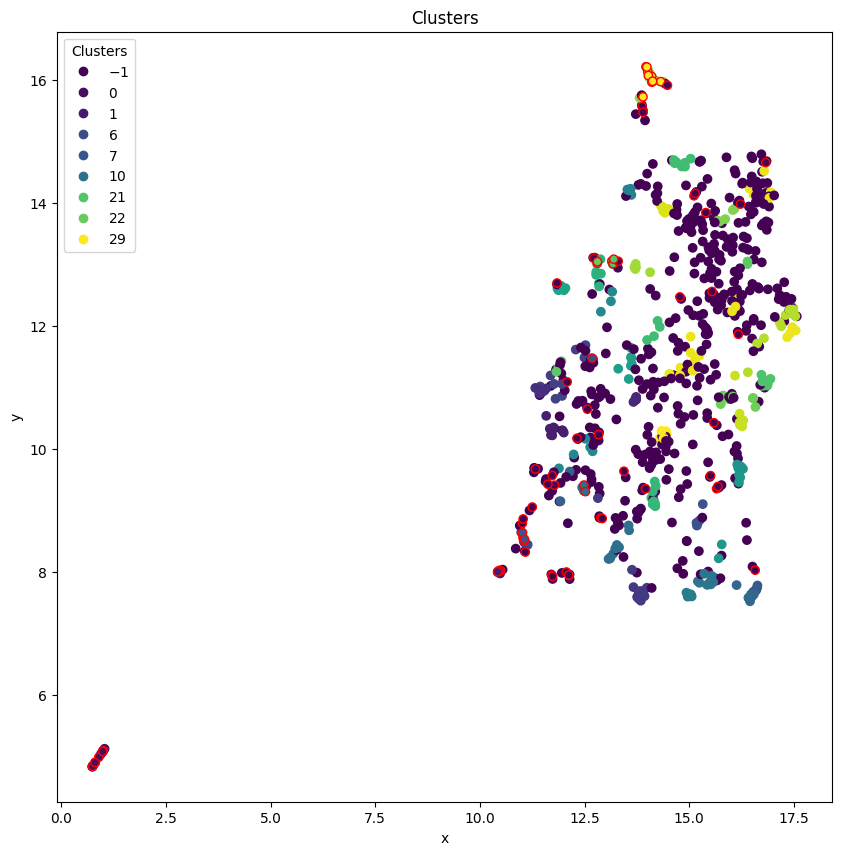

In [5]:
classifier = ClaimClassifier('../Clustering/Models')
output = classifier.classify_v2(response, 'text', 'score', 0.8, show_graph=True)

In [22]:
response

# Filter df where text contains the word 'greta'
response = response[response['text'].str.contains('greta', case=False)]

response

,text,score,index
2,**NM:** How do you interpret the Greta Thunber...,0.062328,1
3,**Camille Paglia:** This strange mummy that is...,0.409666,2
5,Greta Thunberg is the peddler of an apocalypti...,0.269648,4
14,"When I saw Greta’s face near the end, I stoppe...",0.222690,13
16,You guys are just intentionally stupid trolls ...,0.497319,15
...,...,...,...
15311,"Greta's [boat is under way,](https://static.se...",0.591347,99
15314,*](https://justcatamarans.net/outremer-45/)\n\...,0.365521,102
15362,The bullshit runs deep and fast.. Greta's pare...,0.176518,150
15364,"The person at the UN, the UN secretary general...",0.365006,152


In [18]:
output

,embeddings,text,predict,cluster
15,"[0.02705433964729309, 0.02972758188843727, -0....",Actually flying accounts for only about 2 per ...,True,-1
22,"[0.016635743901133537, -0.005733898375183344, ...",CS: Greta has today rejected a european union ...,True,-1
146,"[0.0035556338261812925, 0.007870336063206196, ...",A Fox News guest disparaged teenage climate ac...,False,-1
226,"[-0.019842887297272682, -0.0011674662819132209...","Climate activist Greta Thunberg ""threatened"" U...",False,3
230,"[-0.016861505806446075, 0.017870614305138588, ...",Climate change activist Greta Thunberg deleted...,False,3
277,"[0.030259720981121063, -0.00013532035518437624...",Environmental activist Greta Thunberg admitted...,False,3
308,"[-0.004701871890574694, 0.023502158001065254, ...",Greta Thunberg has gained weight,False,-1
309,"[0.02782745473086834, -0.021795276552438736, -...",Greta Thunberg has revealed that Climate Chang...,False,3
310,"[0.012435205280780792, -0.0184982568025589, -0...",Greta Thunberg said climate change is a hoax,False,3
311,"[-0.016007689759135246, -0.015426438301801682,...",Greta Thunberg said in 2018 that the world wou...,False,3
